Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

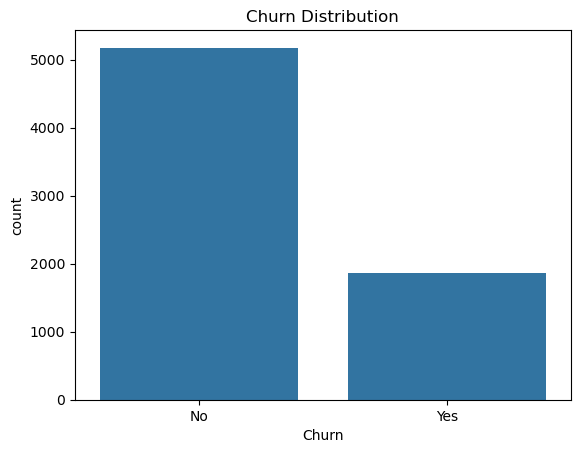

C:\Users\.PY\AppData\Local\Temp\ipykernel_5884\1983386336.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
C:\Users\.PY\AppData\Local\Temp\ipykernel_5884\1983386336.py:51: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if df[column].dtype == np.object:


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import streamlit as st
import pickle

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 1. Problem Understanding and Dataset Exploration
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics of the dataset:")
print(df.describe(include='all'))

# Visualize churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# 2. Data Preprocessing
# Dropping customerID as it's not useful for the prediction
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric, set errors='coerce' to handle non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values in TotalCharges
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encoding categorical variables
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == np.object:
        df[column] = le.fit_transform(df[column])

# Split the dataset into features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Building
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# 4. Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC AUC Score and Curve
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 5. Model Deployment
# Save the model and scaler using pickle
with open('churn_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Streamlit app
st.title("Telecom Customer Churn Prediction")

st.write("Enter the customer details to predict churn:")

# Get user input for features
gender = st.selectbox("Gender", ["Female", "Male"])
senior_citizen = st.selectbox("Senior Citizen", ["No", "Yes"])
partner = st.selectbox("Partner", ["No", "Yes"])
dependents = st.selectbox("Dependents", ["No", "Yes"])
tenure = st.slider("Tenure (Months)", 0, 72, 12)
phone_service = st.selectbox("Phone Service", ["No", "Yes"])
multiple_lines = st.selectbox("Multiple Lines", ["No", "Yes", "No phone service"])
internet_service = st.selectbox("Internet Service", ["DSL", "Fiber optic", "No"])
online_security = st.selectbox("Online Security", ["No", "Yes", "No internet service"])
online_backup = st.selectbox("Online Backup", ["No", "Yes", "No internet service"])
device_protection = st.selectbox("Device Protection", ["No", "Yes", "No internet service"])
tech_support = st.selectbox("Tech Support", ["No", "Yes", "No internet service"])
streaming_tv = st.selectbox("Streaming TV", ["No", "Yes", "No internet service"])
streaming_movies = st.selectbox("Streaming Movies", ["No", "Yes", "No internet service"])
contract = st.selectbox("Contract", ["Month-to-month", "One year", "Two year"])
paperless_billing = st.selectbox("Paperless Billing", ["No", "Yes"])
payment_method = st.selectbox("Payment Method", ["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"])
monthly_charges = st.slider("Monthly Charges", 0, 150, 70)
total_charges = st.slider("Total Charges", 0, 10000, 2000)

# Encode the input values
input_data = np.array([
    1 if gender == "Male" else 0,
    1 if senior_citizen == "Yes" else 0,
    1 if partner == "Yes" else 0,
    1 if dependents == "Yes" else 0,
    tenure,
    1 if phone_service == "Yes" else 0,
    1 if multiple_lines == "Yes" else (2 if multiple_lines == "No phone service" else 0),
    0 if internet_service == "DSL" else (1 if internet_service == "Fiber optic" else 2),
    1 if online_security == "Yes" else (2 if online_security == "No internet service" else 0),
    1 if online_backup == "Yes" else (2 if online_backup == "No internet service" else 0),
    1 if device_protection == "Yes" else (2 if device_protection == "No internet service" else 0),
    1 if tech_support == "Yes" else (2 if tech_support == "No internet service" else 0),
    1 if streaming_tv == "Yes" else (2 if streaming_tv == "No internet service" else 0),
    1 if streaming_movies == "Yes" else (2 if streaming_movies == "No internet service" else 0),
    0 if contract == "Month-to-month" else (1 if contract == "One year" else 2),
    1 if paperless_billing == "Yes" else 0,
    0 if payment_method == "Electronic check" else (1 if payment_method == "Mailed check" else (2 if payment_method == "Bank transfer (automatic)" else 3)),
    monthly_charges,
    total_charges
]).reshape(1, -1)

# Load the saved model and scaler
with open('churn_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

# Scale the input data
scaled_input = loaded_scaler.transform(input_data)

# Predict churn
prediction = loaded_model.predict(scaled_input)

# Display the prediction
if prediction == 1:
    st.write("The model predicts that this customer will **churn**.")
else:
    st.write("The model predicts that this customer will **not churn**.")

# 6. Presentation and Documentation
# The code itself and this Streamlit app are part of the deliverables. For documentation, you can create a Markdown file or a Jupyter notebook that explains each step in detail.


Accuracy: 79.70%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.79      1409



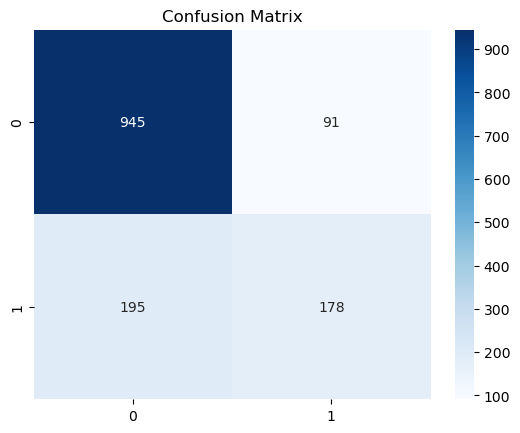

ROC AUC Score: 0.69


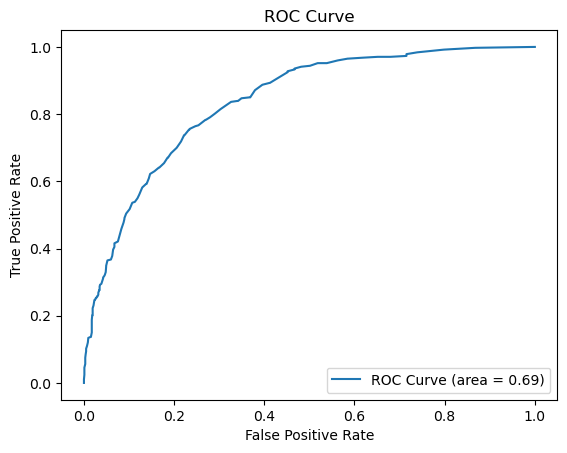

2024-08-31 11:08:42.472 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 11:08:42.558 
  command:

    streamlit run C:\Users\.PY\anaconda3\envs\pandas_playground\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-08-31 11:08:42.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 11:08:42.561 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 11:08:42.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 11:08:42.563 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 11:08:42.565 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 11:08:42.566 Th

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import streamlit as st
import pickle

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Drop customerID as it's not useful for the prediction
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric, set errors='coerce' to handle non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values in TotalCharges
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Encoding categorical variables
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == object:  # Use 'object' instead of 'np.object'
        df[column] = le.fit_transform(df[column])

# Split the dataset into features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC AUC Score and Curve
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.2f}")
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model and scaler using pickle
with open('churn_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Streamlit app
st.title("Telecom Customer Churn Prediction")
st.write("Enter the customer details to predict churn:")

# Get user input for features
gender = st.selectbox("Gender", ["Female", "Male"])
senior_citizen = st.selectbox("Senior Citizen", ["No", "Yes"])
partner = st.selectbox("Partner", ["No", "Yes"])
dependents = st.selectbox("Dependents", ["No", "Yes"])
tenure = st.slider("Tenure (Months)", 0, 72, 12)
phone_service = st.selectbox("Phone Service", ["No", "Yes"])
multiple_lines = st.selectbox("Multiple Lines", ["No", "Yes", "No phone service"])
internet_service = st.selectbox("Internet Service", ["DSL", "Fiber optic", "No"])
online_security = st.selectbox("Online Security", ["No", "Yes", "No internet service"])
online_backup = st.selectbox("Online Backup", ["No", "Yes", "No internet service"])
device_protection = st.selectbox("Device Protection", ["No", "Yes", "No internet service"])
tech_support = st.selectbox("Tech Support", ["No", "Yes", "No internet service"])
streaming_tv = st.selectbox("Streaming TV", ["No", "Yes", "No internet service"])
streaming_movies = st.selectbox("Streaming Movies", ["No", "Yes", "No internet service"])
contract = st.selectbox("Contract", ["Month-to-month", "One year", "Two year"])
paperless_billing = st.selectbox("Paperless Billing", ["No", "Yes"])
payment_method = st.selectbox("Payment Method", ["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"])
monthly_charges = st.slider("Monthly Charges", 0, 150, 70)
total_charges = st.slider("Total Charges", 0, 10000, 2000)

# Encode the input values
input_data = np.array([
    1 if gender == "Male" else 0,
    1 if senior_citizen == "Yes" else 0,
    1 if partner == "Yes" else 0,
    1 if dependents == "Yes" else 0,
    tenure,
    1 if phone_service == "Yes" else 0,
    1 if multiple_lines == "Yes" else (2 if multiple_lines == "No phone service" else 0),
    0 if internet_service == "DSL" else (1 if internet_service == "Fiber optic" else 2),
    1 if online_security == "Yes" else (2 if online_security == "No internet service" else 0),
    1 if online_backup == "Yes" else (2 if online_backup == "No internet service" else 0),
    1 if device_protection == "Yes" else (2 if device_protection == "No internet service" else 0),
    1 if tech_support == "Yes" else (2 if tech_support == "No internet service" else 0),
    1 if streaming_tv == "Yes" else (2 if streaming_tv == "No internet service" else 0),
    1 if streaming_movies == "Yes" else (2 if streaming_movies == "No internet service" else 0),
    0 if contract == "Month-to-month" else (1 if contract == "One year" else 2),
    1 if paperless_billing == "Yes" else 0,
    0 if payment_method == "Electronic check" else (1 if payment_method == "Mailed check" else (2 if payment_method == "Bank transfer (automatic)" else 3)),
    monthly_charges,
    total_charges
]).reshape(1, -1)

# Load the saved model and scaler
with open('churn_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

# Scale the input data
scaled_input = loaded_scaler.transform(input_data)

# Predict churn
prediction = loaded_model.predict(scaled_input)

# Display the prediction
if prediction == 1:
    st.write("The model predicts that this customer will **churn**.")
else:
    st.write("The model predicts that this customer will **not churn**.")
